In [1]:
library('tidyverse')
library('dplyr')
library('forcats')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
premier_league = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-04-04/soccer21-22.csv',
    col_types = cols()
)

In [3]:
premier_league |> head()

Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,⋯,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,⋯,3,4,12,8,2,5,0,0,0,0
14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,⋯,8,3,11,9,5,4,1,2,0,0
14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,⋯,3,8,10,7,7,6,2,1,0,0
14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,⋯,6,1,15,11,5,2,0,0,0,0
14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,⋯,6,3,13,15,6,8,2,0,0,0
14/08/2021,Leicester,Wolves,1,0,H,1,0,H,C Pawson,⋯,5,3,6,10,5,4,1,2,0,0


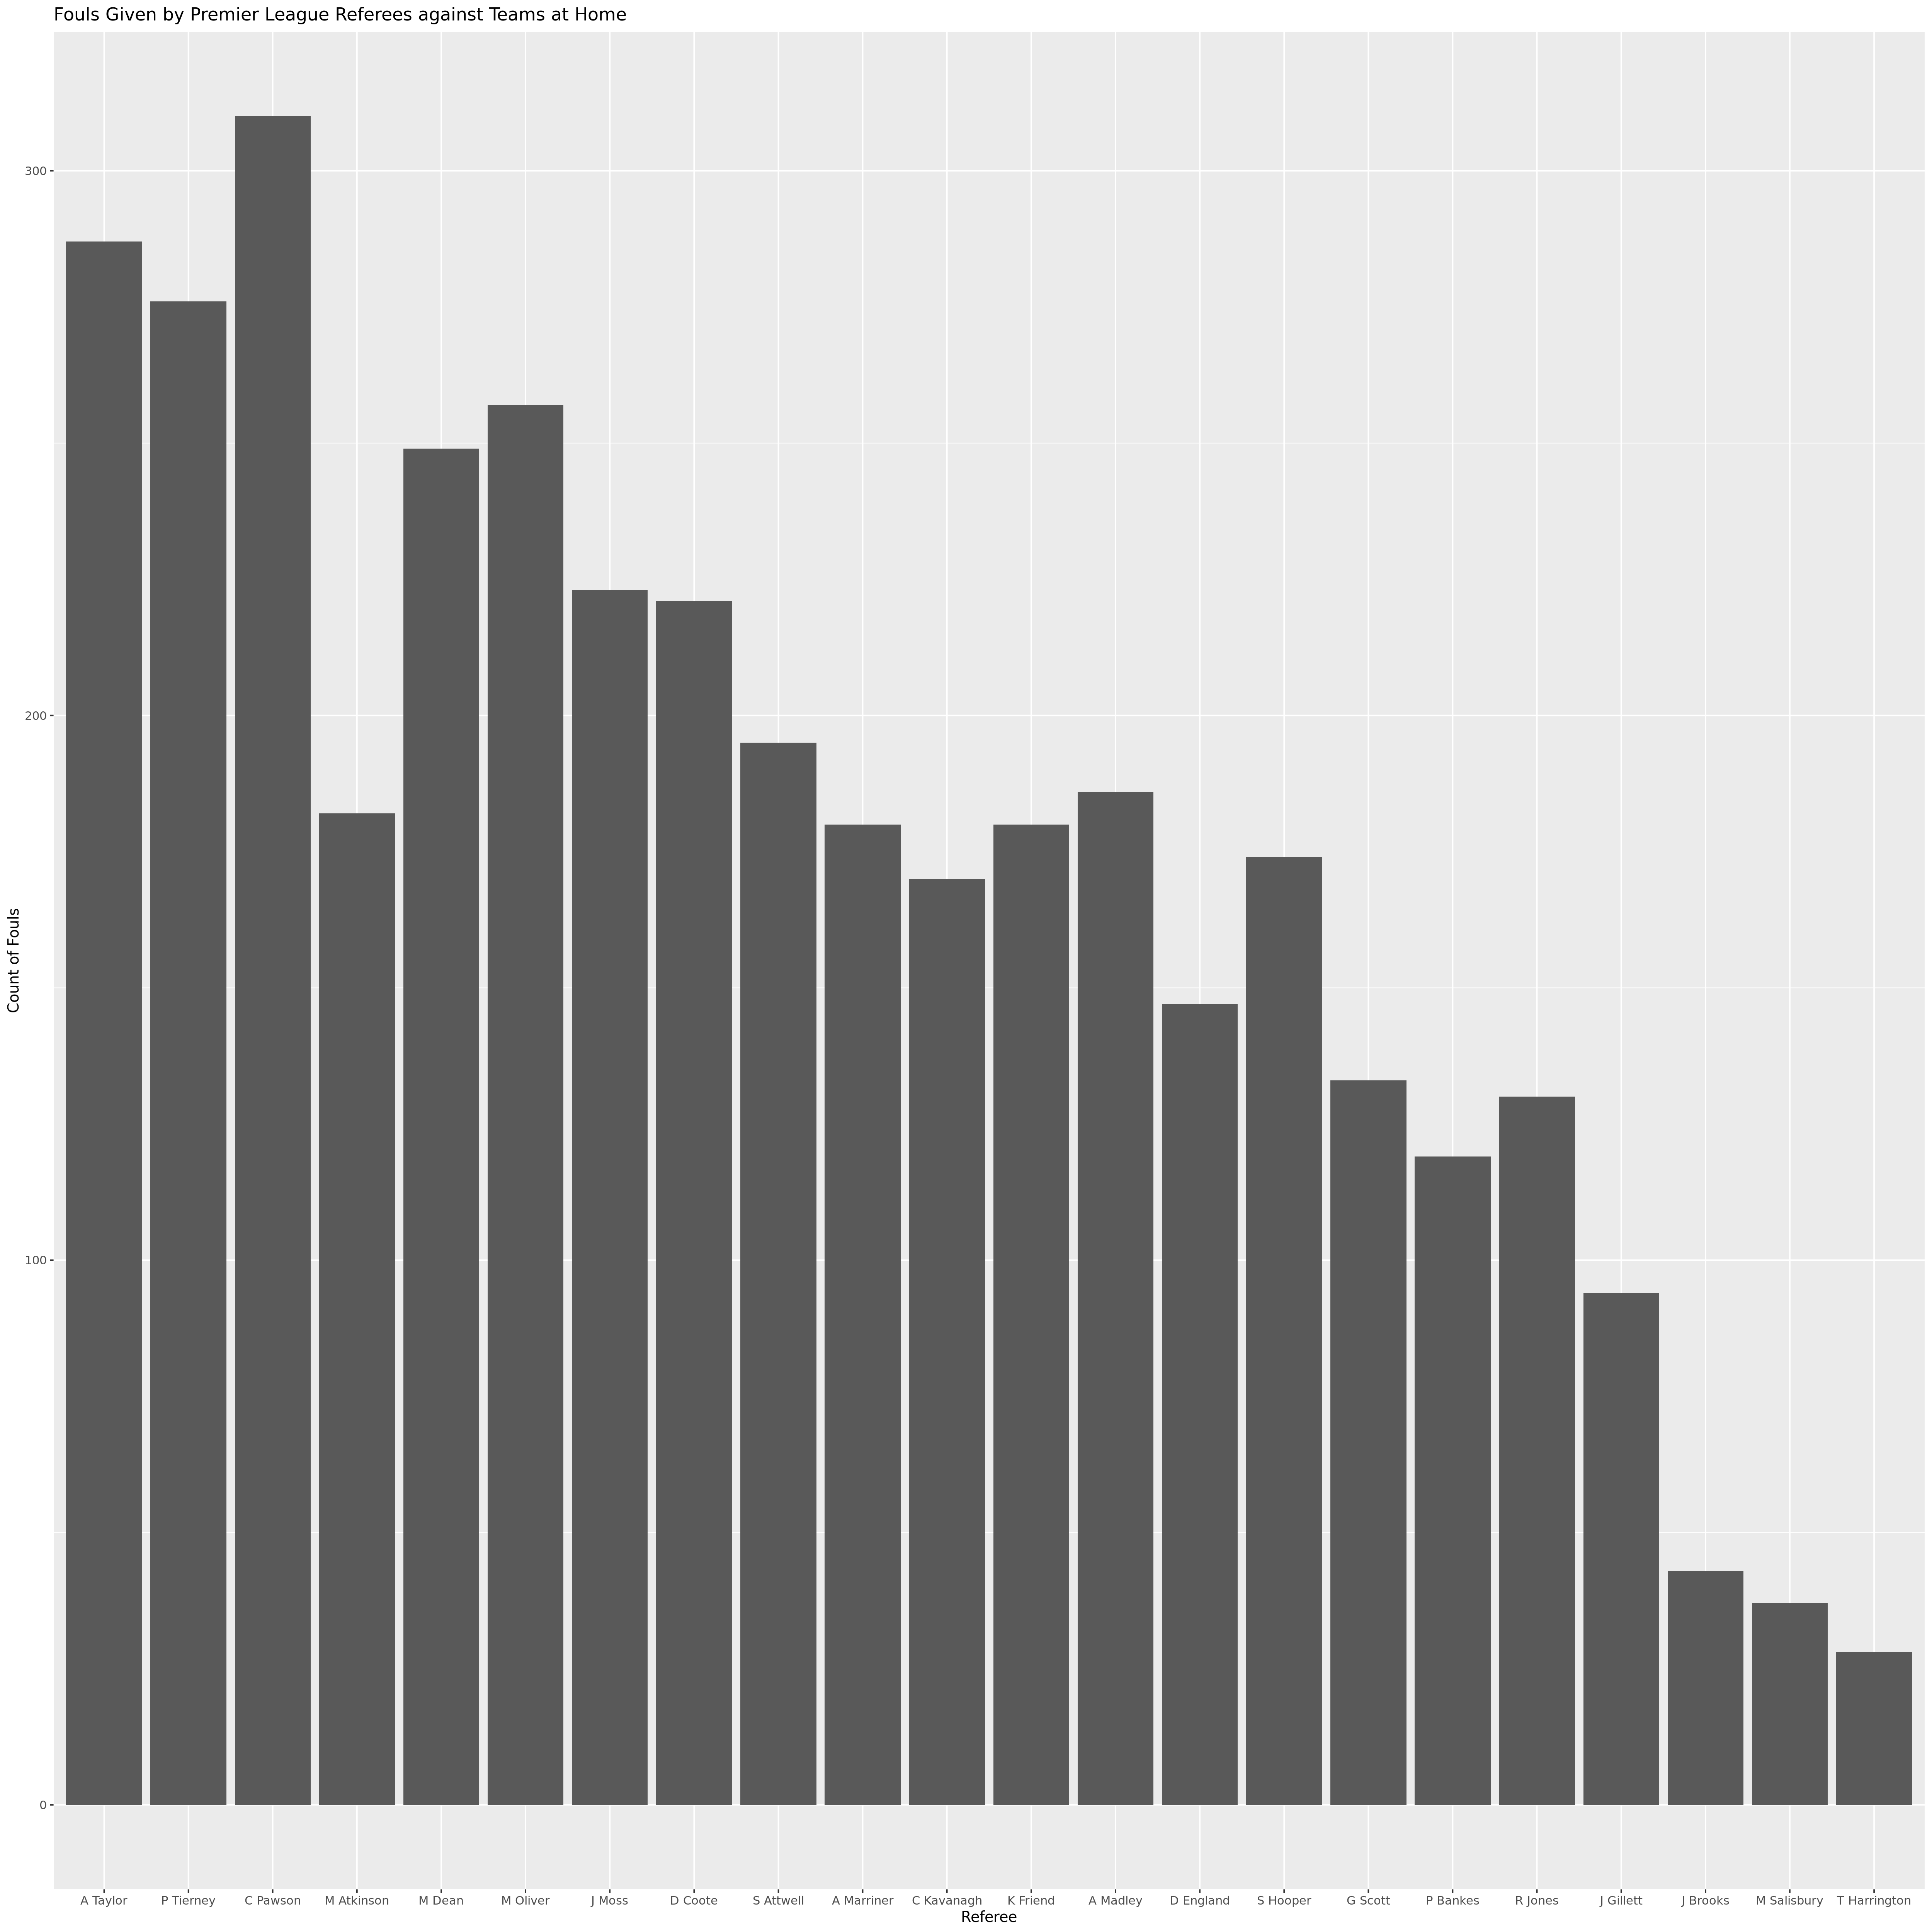

In [13]:
options(repr.plot.res = 250, repr.plot.height = 20, repr.plot.width = 20)

p = ggplot(premier_league, aes(x = fct_infreq(Referee), y = HF)) + geom_bar(stat = "identity") + labs(title = "Fouls Given by Premier League Referees against Teams at Home", x = "Referee", y = "Count of Fouls")

p

    In this visualization, we looked to plot the number of fouls given by Premier League referees against teams that were playing at home. After initially loading the raw data, we used the head() function to display the data and choose what we want to plot. From that, we are able to set our x and y values as the variables “Referees” and “HF” (Home Fouls), respectively. The function “geom_bar” can help to visualize the differences in the number of fouls given between different referees. Additionally, using the forcats function “fct_infreq” ordered numerically the number of fouls (from highest to lowest) given by Premier League referees against home teams. Finally, using stat = “identity” helps to keep track of the total times referees called fouls against home sides.

    Looking at the data, the referee that gives the most fouls against home teams is Craig Pawson, the only referee to give over 300 fouls against home teams in the 2021-2022 season. Referees who also gave fouls against home teams include Anthony Taylor and Paul Tierney. Comparatively, referees that did not give as many fouls against home teams were Michael Salisbury, Tony Harrington, and John Brooks. Visually, many referees gave a little more or under 200 fouls against home teams.

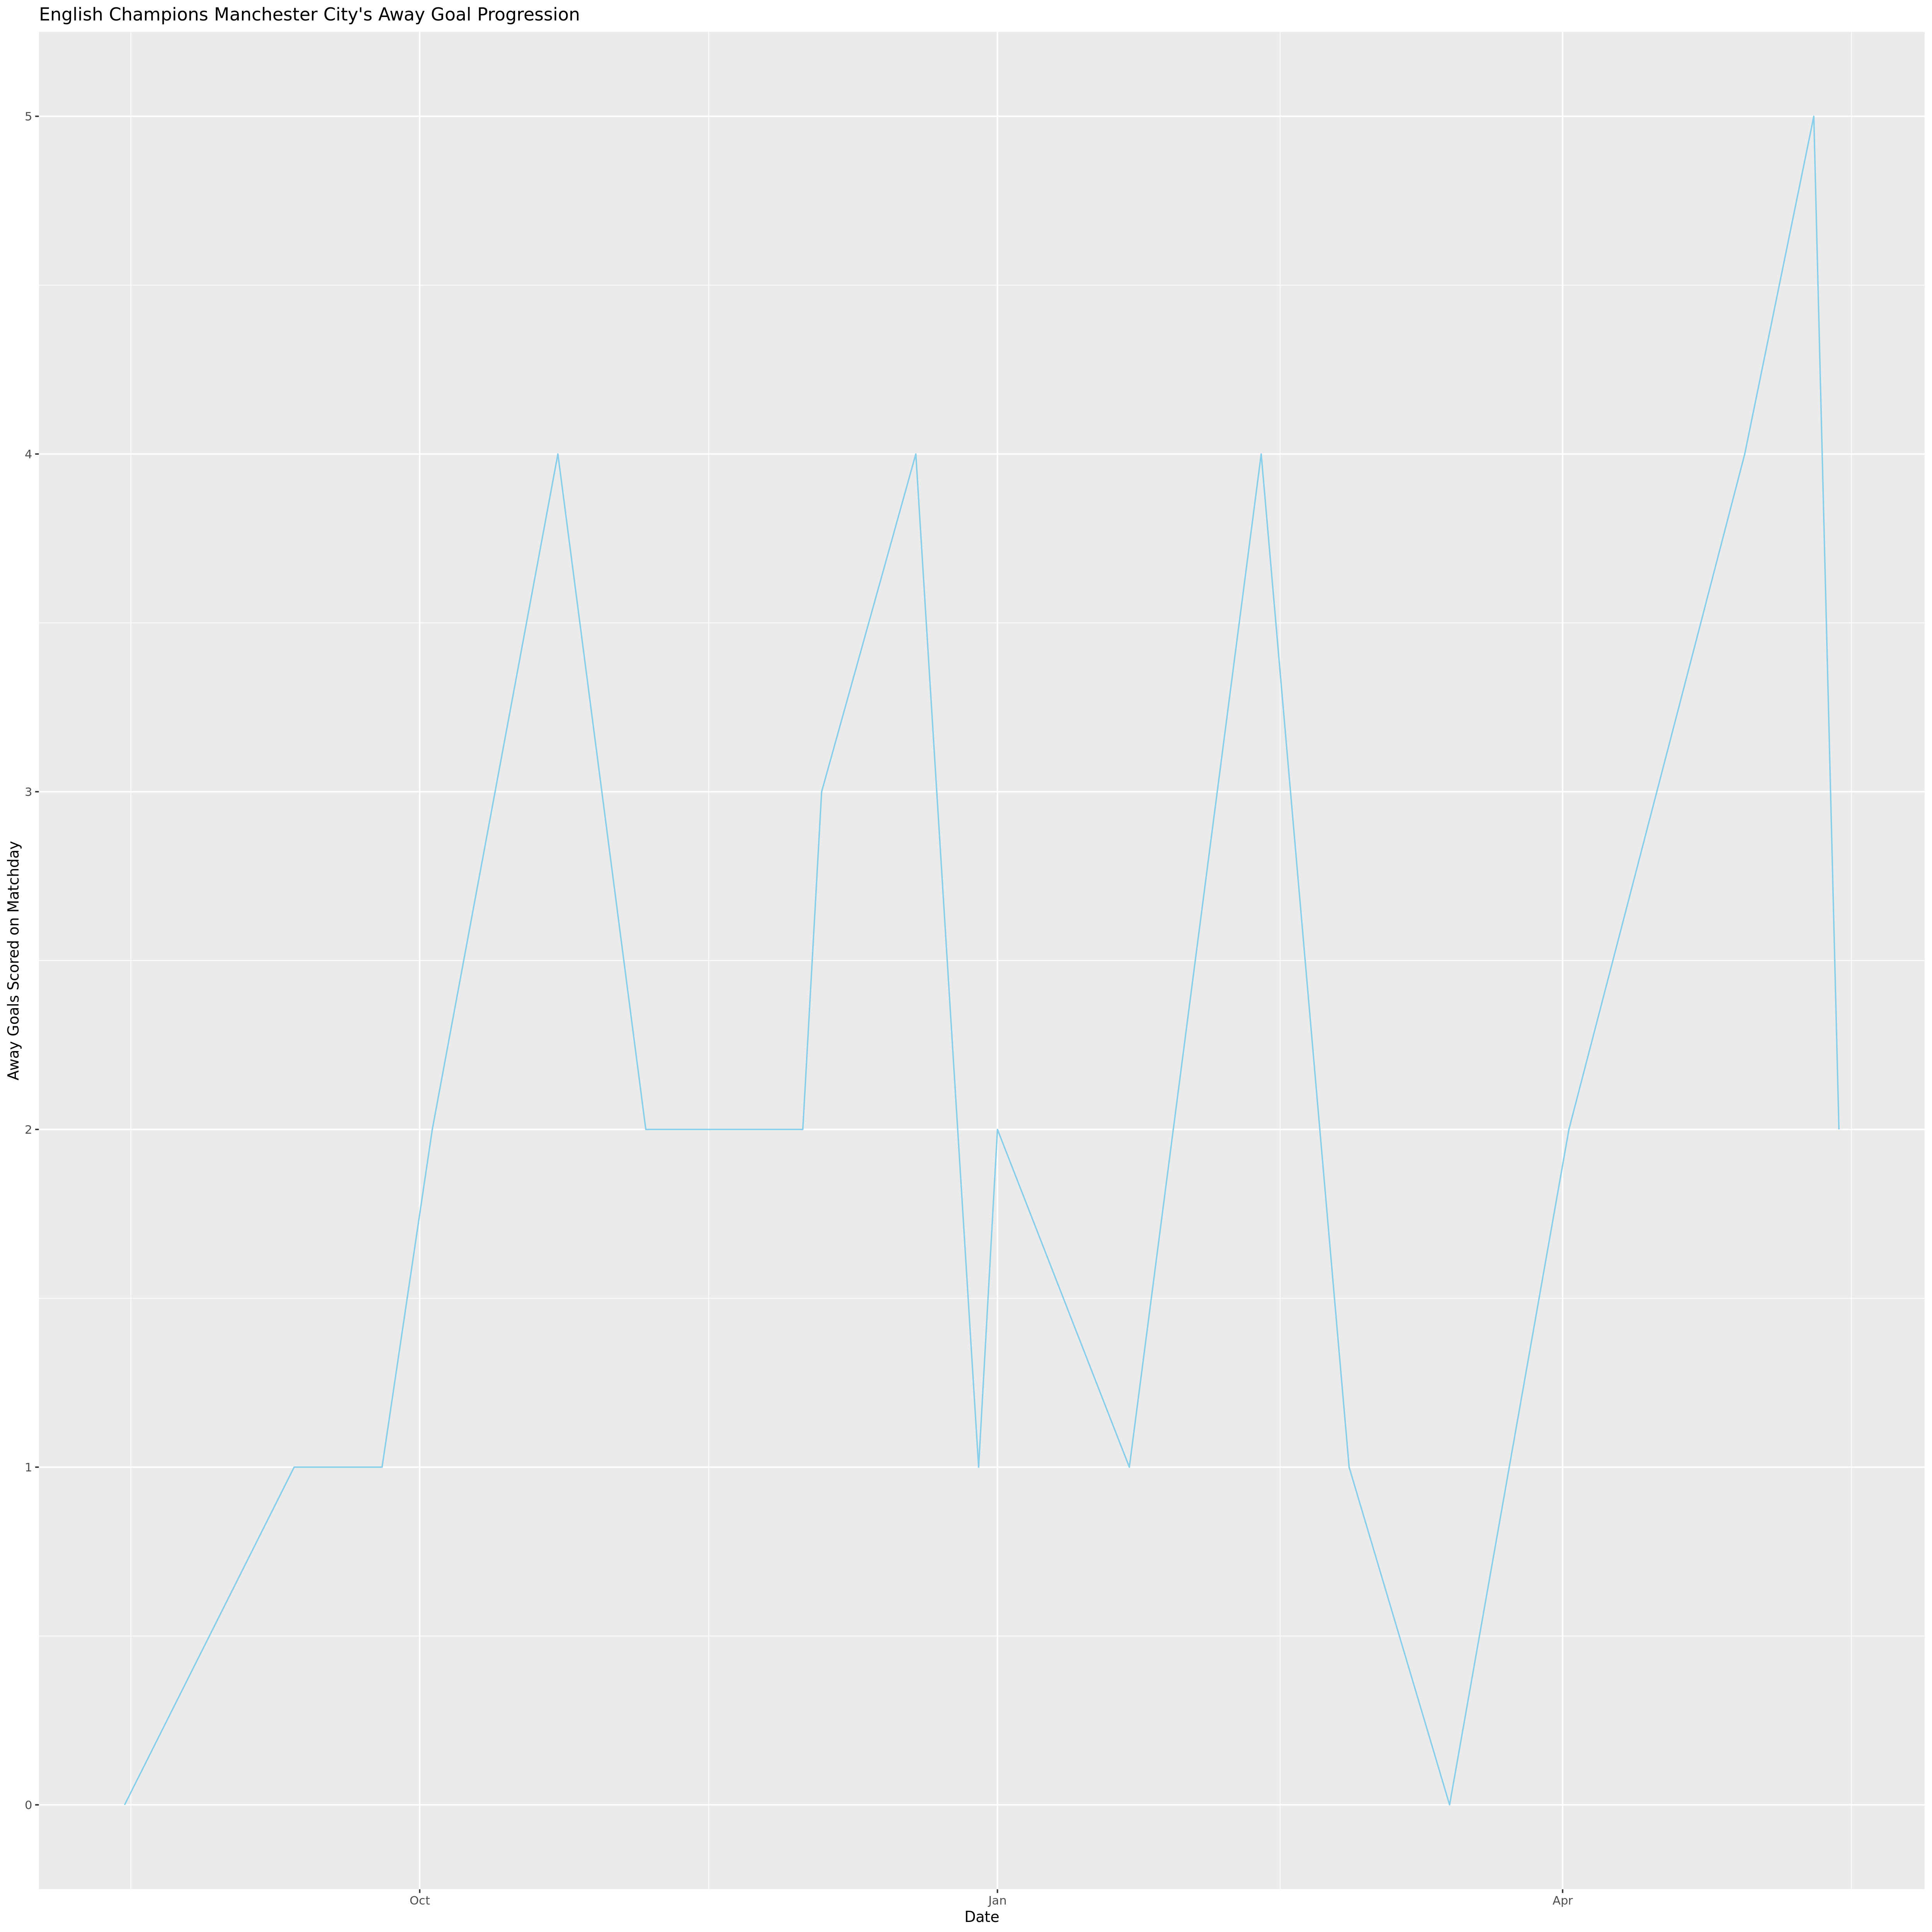

In [5]:
man_city <- premier_league |>
  mutate(Date = as.Date(Date, format = "%d/%m/%Y")) |>
  filter(AwayTeam == "Man City") |>
  arrange(Date)

p <- ggplot(man_city, aes(x = Date, y = FTAG)) +
  geom_line(color = 'skyblue') +
  labs(title = "English Champions Manchester City's Away Goal Progression", x = "Date", y = "Away Goals Scored on Matchday")

p

    In this visualization, we looked to follow the goalscoring patterns of the eventual champions of the season, Manchester City, when playing away. The most important thing was to use dplyr functions to be able to draw data relating to Manchester City only. After loading a variable under the “man_city”, we used the mutate function to organize the dates that Man. City played across the season. Next, we filtered the AwayTeam to be “Man City”. Again, these functions under dplyr helps us to organize and get specific data that we want.

    Finally, we arranged the dates of the season from August 2021 to May 2022. From this, we can plot the man_city string using the aesthetics of Date and “Full Time Away Goals”, as our x and y values respectively. The geom_line function was used to connect the goals they scored in next of the 19 away games of the season (color “skyblue” as the team color). Visually, we can see that Manchester City initially struggled to score a high amount of goals away from home until around October/November, and overall had peaks in scoring away from home in November, December, March, and May.

In [6]:
LondonTeams = c('Arsenal', 'Brentford', 'Chelsea', 'Crystal Palace', 'Tottenham', 'West Ham')

In [7]:
London = premier_league |>
  filter(HomeTeam %in% LondonTeams)

London |> head()

Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,⋯,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,⋯,3,4,12,8,2,5,0,0,0,0
14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,⋯,6,1,15,11,5,2,0,0,0,0
15/08/2021,Tottenham,Man City,1,0,H,0,0,D,A Taylor,⋯,3,4,11,8,3,11,2,1,0,0
21/08/2021,Crystal Palace,Brentford,0,0,D,0,0,D,M Atkinson,⋯,2,3,12,9,3,5,3,1,0,0
22/08/2021,Arsenal,Chelsea,0,2,A,0,2,A,P Tierney,⋯,3,5,10,4,9,8,3,0,0,0
23/08/2021,West Ham,Leicester,4,1,H,1,0,H,M Oliver,⋯,7,1,8,8,10,0,0,1,0,1


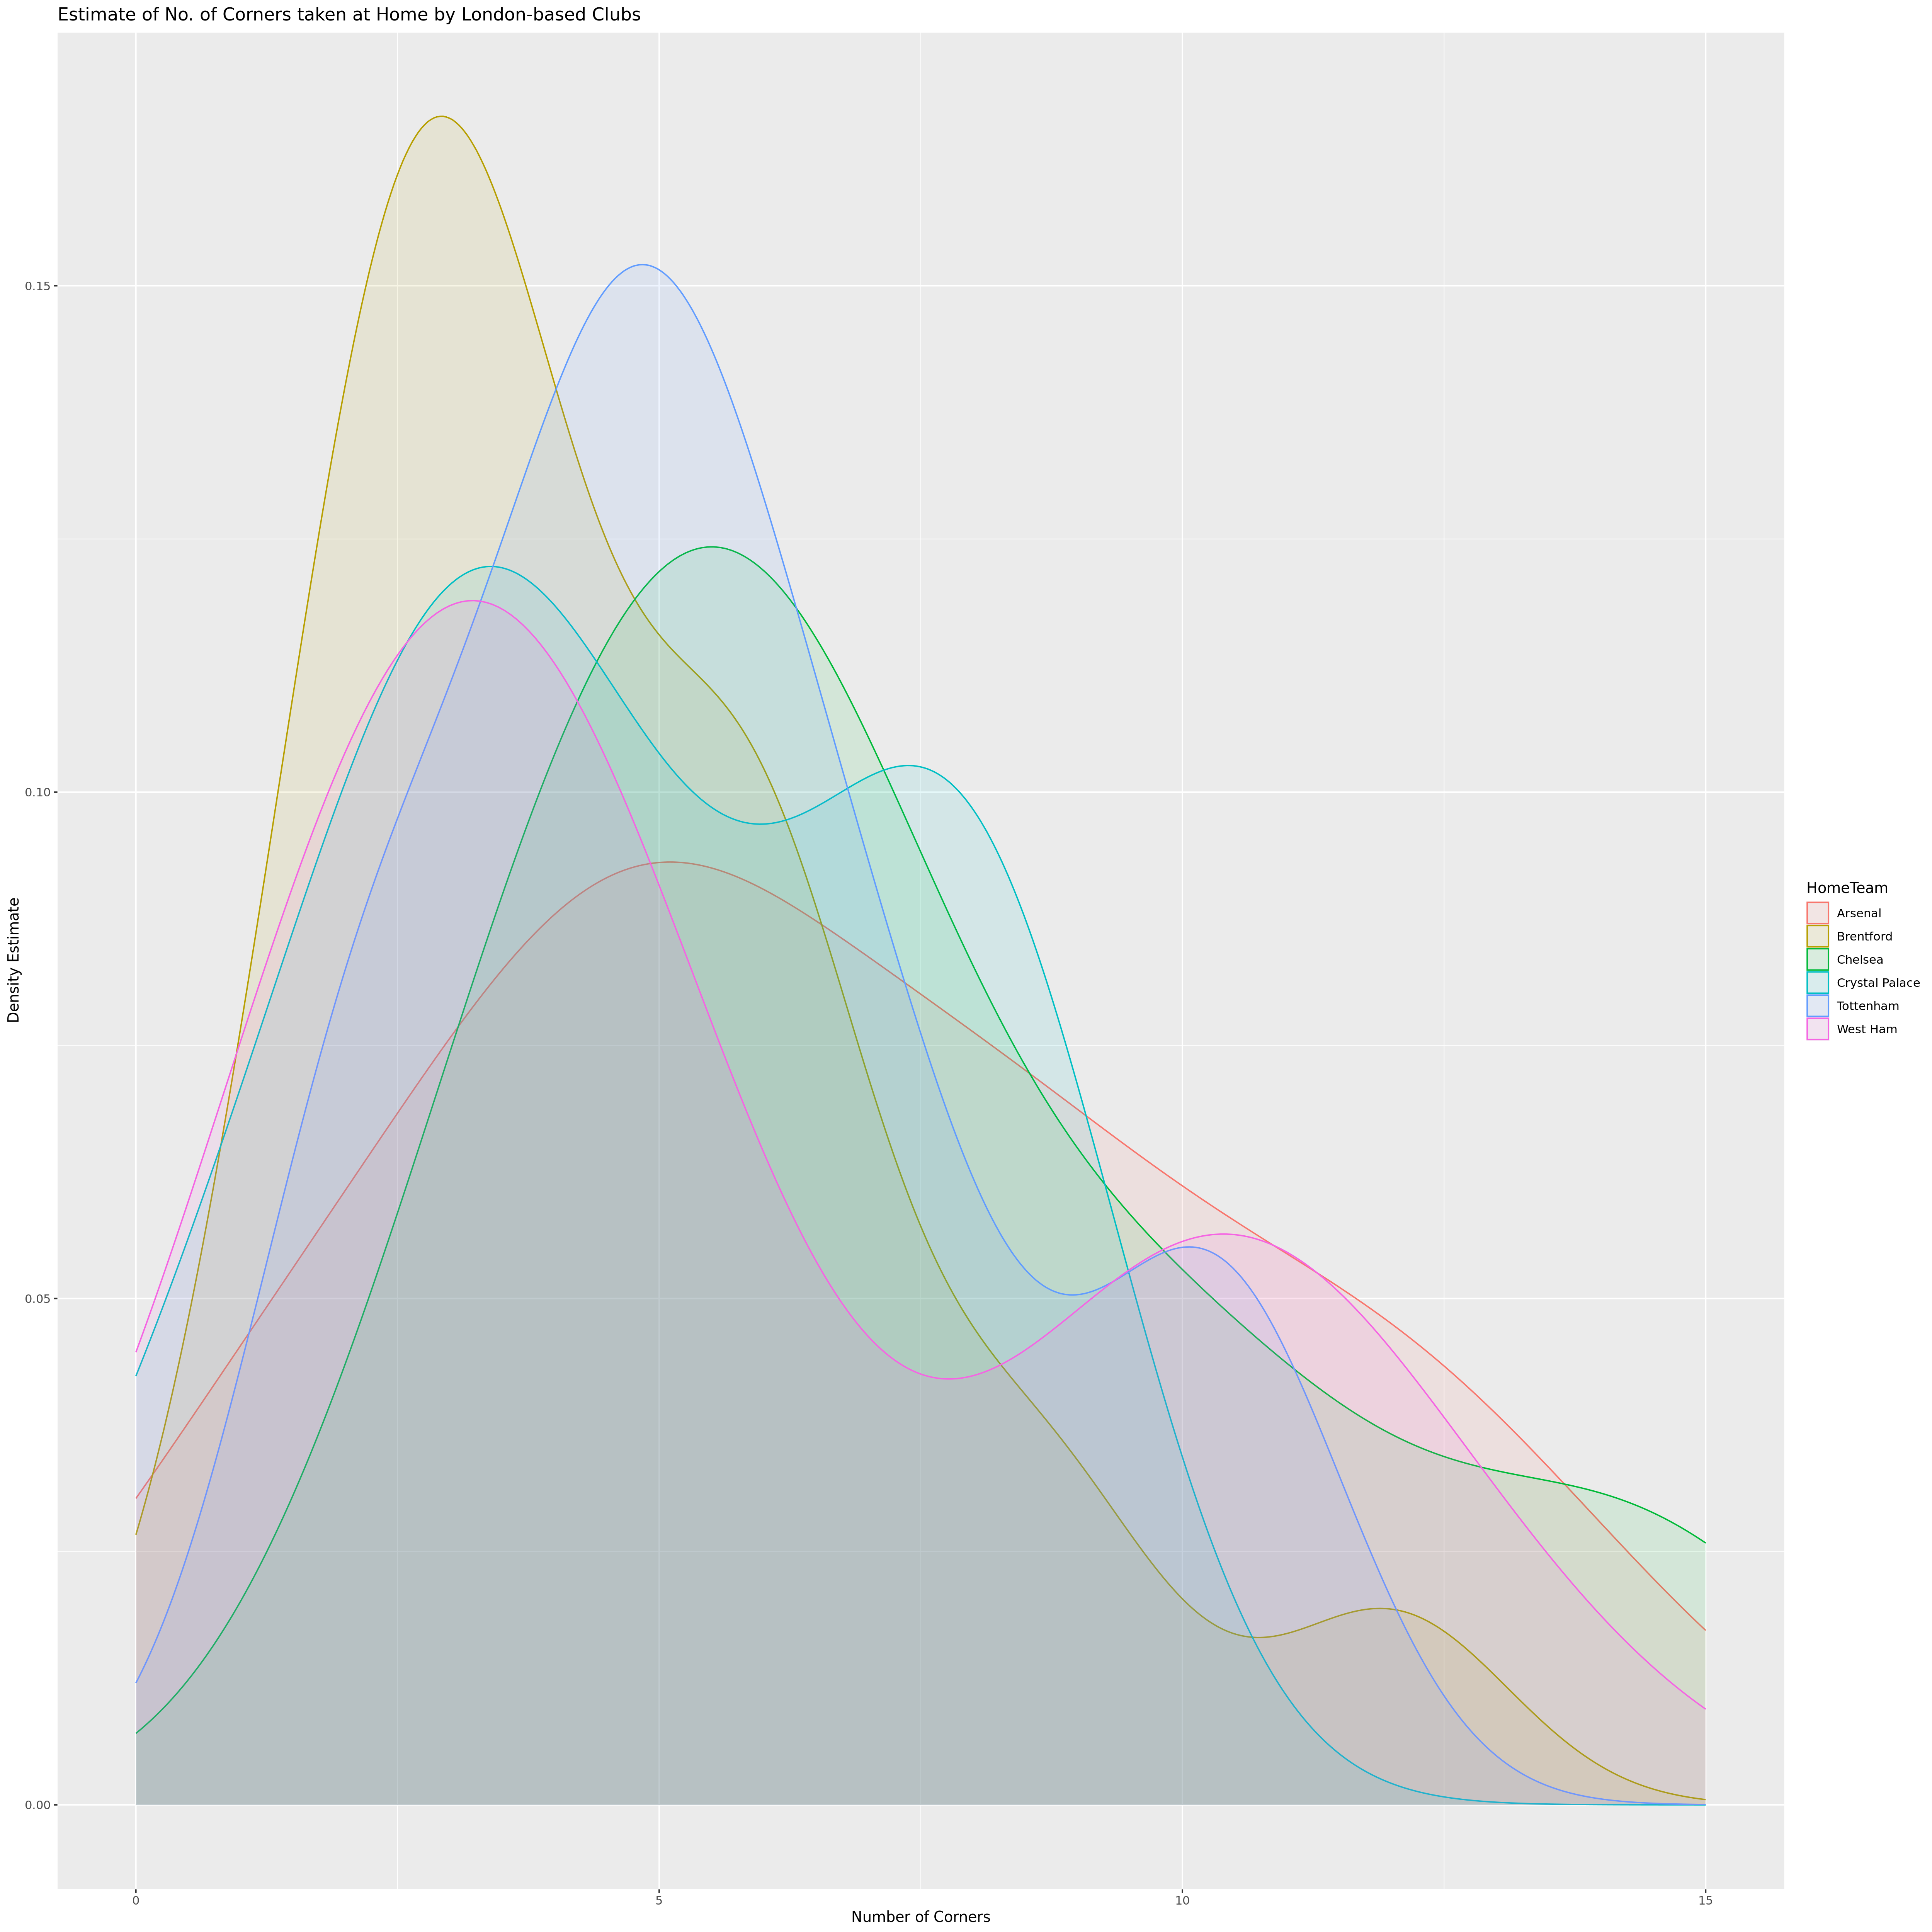

In [8]:
p = ggplot(London, aes(HC, fill = HomeTeam, color = HomeTeam)) +
  geom_density(alpha = 0.1) + labs(title = "Estimate of No. of Corners taken at Home by London-based Clubs", x = "Number of Corners", y = "Density Estimate")

p

    In this visualization, we looked at the estimated number of corners that London-based teams take at home. To do this, we first created a vector of clubs based in London, which include Arsenal, Brentford, Chelsea, Crystal Palace, Tottenham Hotspur, and West Ham. This vector was stored under the name “LondonTeams”. Similarly to what we did with the Manchester City plot, we stored our data under a special name called “London”. After, we filtered our data to extract our HomeTeam as London-based clubs only. We then visualize ‘London’ using the head() command, and can confirm that the column “HomeTeam” has the London-based teams we wrote under the vector.

    We used an x variable only for this plot, which was HC (home corners). We introduced individual London-based teams on our plot using colors to specify, making it easier to see and understand, and serves as a legend of sorts. To make the plot more appealing, we used alpha as part of the smooth distribution, and fills the lines transparently. From the data, we can see that Brentford had the highest expected estimate of corners taken at home, which is around 3.5-4 corners expected at ~17.5%.